Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Overview


In [2]:
titanic_data = pd.read_csv('data/train.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.shape

(891, 12)

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

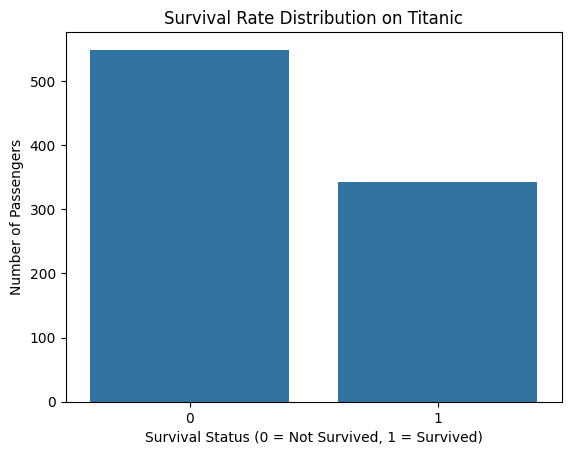

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


In [7]:
sns.countplot(x='Survived', data=titanic_data)
plt.title("Survival Rate Distribution on Titanic")
plt.xlabel("Survival Status (0 = Not Survived, 1 = Survived)")
plt.ylabel("Number of Passengers")
plt.show()

survival_rate = titanic_data['Survived'].value_counts(normalize=True) * 100
print(survival_rate)

In [8]:
print("Approximately only 38.38% people survived on the ship.")
print("Dataset is imbalance; there are more non-survivors than survivors.")

Approximately only 38.38% people survived on the ship.
Dataset is imbalance; there are more non-survivors than survivors.


Univariate Analysis

<Axes: xlabel='Age', ylabel='Count'>

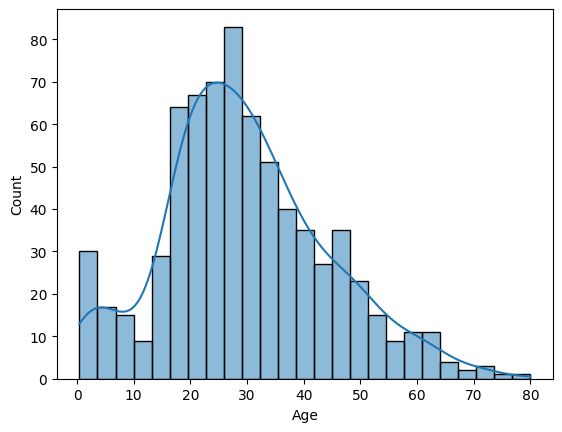

In [9]:
#Age Distribution
sns.histplot(titanic_data['Age'], bins = 25, kde=True)


In [10]:
print("Analysis 1: People from age around 30 were the most")

Analysis 1: People from age around 30 were the most


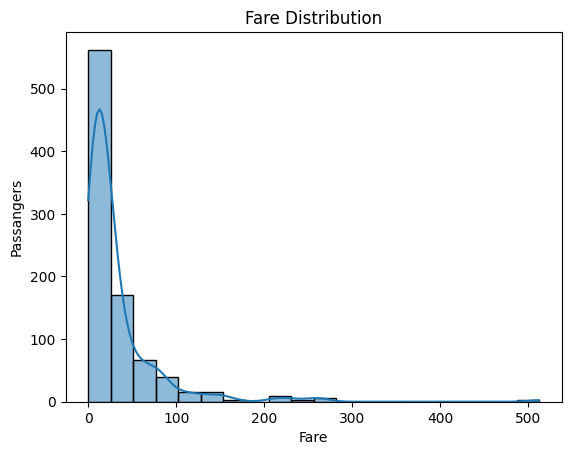

Analysis 2: Average fare was 32.204207968574636
Analysis 3: Maximum fare was 512.3292


In [11]:
#Fare Distribution 
sns.histplot(titanic_data['Fare'], bins = 20, kde=True)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Passangers")
plt.show()

avg_fare = titanic_data["Fare"].mean()
max_fare = titanic_data["Fare"].max()
print(f"Analysis 2: Average fare was {avg_fare}")
print(f"Analysis 3: Maximum fare was {max_fare}")


Passengers per class:
Pclass
1    216
2    184
3    491
Name: count, dtype: int64

Grand Total: 891


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8092\2264907100.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic_data, x='Pclass', palette='dark')


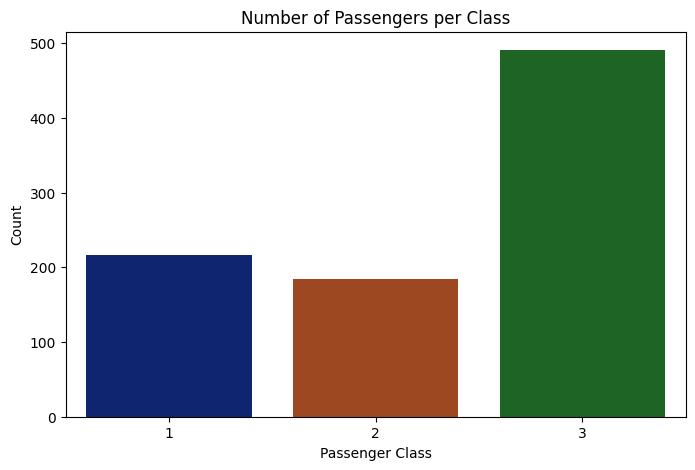

In [12]:
#Passangers across different classes

plt.figure(figsize=(8, 5))
sns.countplot(data=titanic_data, x='Pclass', palette='dark')
plt.title('Number of Passengers per Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')

# Get counts per class
class_counts = titanic_data['Pclass'].value_counts().sort_index()

# Print the breakdown
print("Passengers per class:")
print(class_counts)

# Print the grand total
print(f"\nGrand Total: {class_counts.sum()}")

In [13]:
count = titanic_data["Sex"].value_counts()
print(f"No. of male: {count.male}")
print(f"No. of female: {count.female}")



No. of male: 577
No. of female: 314


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8092\4038070940.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=titanic_data, palette = "dark")


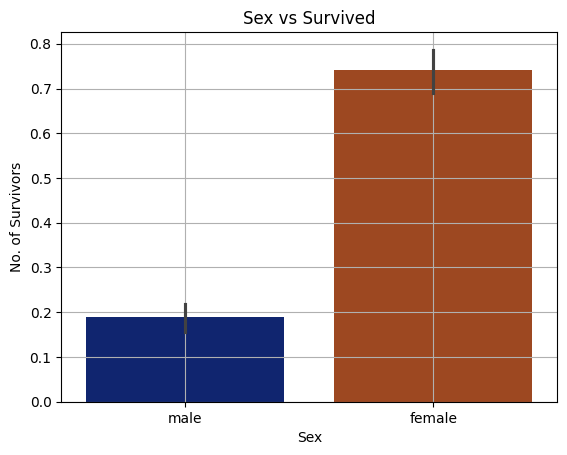

In [14]:
# Survival vs sex

sns.barplot(x='Sex', y='Survived', data=titanic_data, palette = "dark")
plt.title("Sex vs Survived")
plt.xlabel("Sex")
plt.ylabel("No. of Survivors")
plt.grid()
plt.show()

In [15]:
print("Analysis 3: Female have higher survival rate than male; means women were given priority to escort from ship.")

Analysis 3: Female have higher survival rate than male; means women were given priority to escort from ship.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8092\717457569.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=titanic_data, palette = "dark")


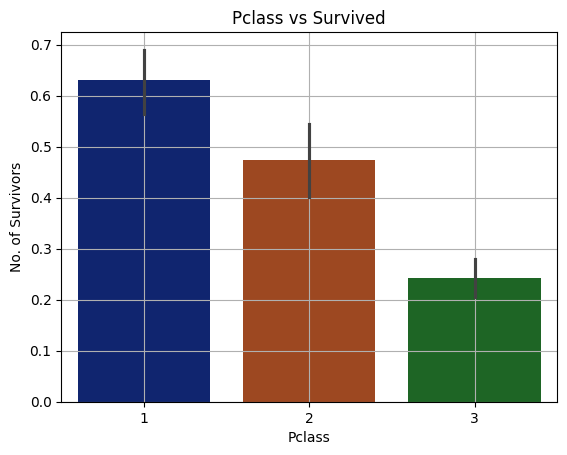

In [16]:
#Survival vs Passenger class

sns.barplot(x='Pclass', y='Survived', data=titanic_data, palette = "dark")
plt.title("Pclass vs Survived")
plt.xlabel("Pclass")
plt.ylabel("No. of Survivors")
plt.grid()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8092\547868853.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=titanic_data, palette="dark", errorbar=None)


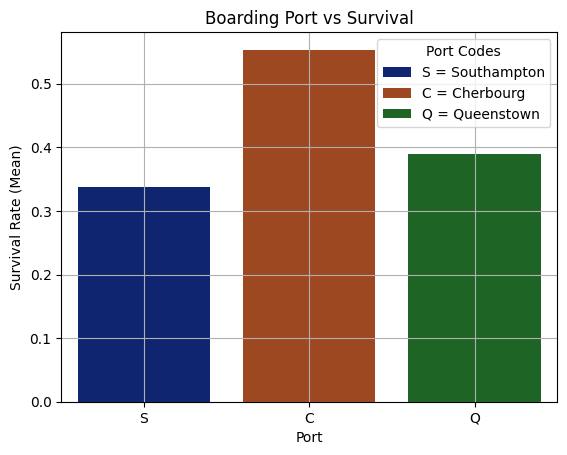

In [17]:
#Survival vs Embarked

sns.barplot(x='Embarked', y='Survived', data=titanic_data, palette="dark", errorbar=None)

plt.title("Boarding Port vs Survival")
plt.xlabel("Port")
plt.ylabel("Survival Rate (Mean)")
plt.legend(title='Port Codes', labels=['S = Southampton', 'C = Cherbourg', 'Q = Queenstown'])
plt.grid() 

Multivariate Analysis

<Axes: xlabel='Pclass', ylabel='Age'>

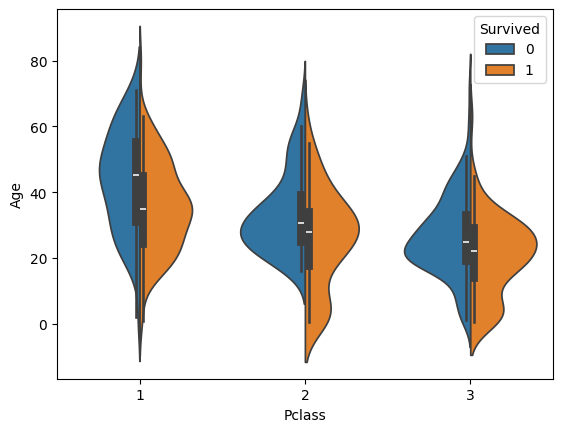

In [18]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=titanic_data, split=True)


<Axes: xlabel='Pclass', ylabel='Fare'>

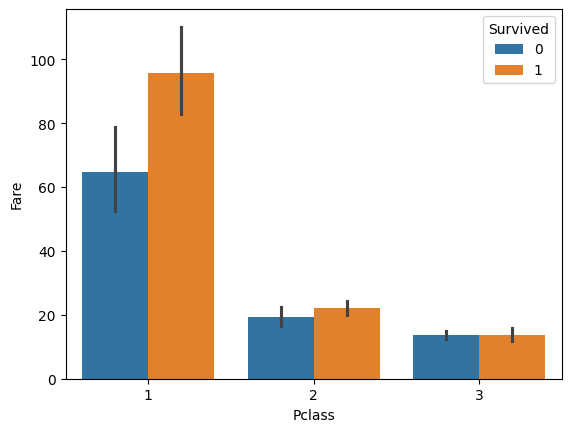

In [24]:
#Fare vs Class vs Survival

sns.barplot(x='Pclass', y='Fare', hue='Survived', data=titanic_data)
